In [1]:
import pandas as pd
import numpy as np
import wrds
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time
import sklearn.linear_model,sklearn.decomposition

In [105]:
option_data=pd.read_csv("index_option_data.csv")
selected_stock=pd.read_csv("final_stocks_data.csv")
signal=pd.read_csv("signal.csv")
constituent_option=pd.read_csv("selected_options_2015.csv")
signal=signal.set_index("date")
sp=pd.read_csv("sp500_level_2015.csv")

/Users/alun/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [106]:
sp
#for t in option_data["date"]:
    

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
1,2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2,2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
3,2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
4,2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000
...,...,...,...,...,...,...,...
247,2015-12-24,2063.520020,2067.360107,2058.729980,2060.989990,2060.989990,1411860000
248,2015-12-28,2057.770020,2057.770020,2044.199951,2056.500000,2056.500000,2492510000
249,2015-12-29,2060.540039,2081.560059,2060.540039,2078.360107,2078.360107,2542000000
250,2015-12-30,2077.340088,2077.340088,2061.969971,2063.360107,2063.360107,2367430000


In [107]:
# signal=signal.set_index("date")
# for t in signal.index:
#     if signal.loc[t,"Long/short"]==1:
        
#option_data=option_data[option_data["cp_flag"]=="C"]   
#sp.set_index("Date",inplace=True)
sp500_price=sp["Adj Close"]*1000
sp500_time=sp["Date"].to_list()
sp500_dic=dict(zip(sp500_time,sp500_price))
#sp=sp500.to_list()
opt=option_data[option_data["cp_flag"]=="C"]
opt=opt.set_index("date")
#opt=option_data.loc["2015/01/02"]["strike_price"].to_list()
#sp.index
#opt
#opt
#option_data


In [110]:
opt=opt.loc["2015/01/02"]["strike_price"].to_list()
opt

AttributeError: 'list' object has no attribute 'loc'

In [ ]:
def index30(p):
    a=tp.dif.to_list()
    a=[x-p for x in a]
    pos=[]
    neg=[]
    if 0 in a:
        return a.index(0)
    if max(a)<0:
        return a.index(max(a))
    if min(a)>0:
        return a.index(min(a))
        
    for ch in a:
        if ch >=0:
            neg.append(ch)
        else:
            pos.append(ch)
    neg.sort()
    pos.sort(reverse=True)
    an=neg[0]
    ap=pos[0]
    x=a.index(an)
    y=a.index(ap)
    return [x,y]

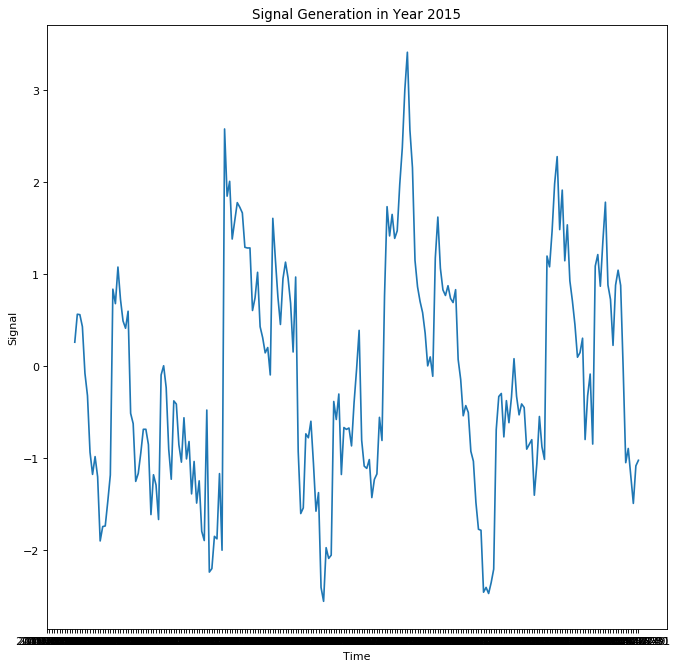

In [48]:
plt.figure(figsize=(10, 10), dpi=80)
plt.title("Signal Generation in Year 2015")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.plot(signal["Standardized_Signal"])#refinement

In [17]:
a=signal["Standardized_Signal"].to_list()

In [24]:
signal_15=[int(x>1.5) for x in a]
signal["Long/Short"]=signal_15

In [40]:
signal["Standardized_Signal"]=(signal["impl_corr"]-signal["impl_corr"].rolling(30).mean())/signal["impl_corr"].rolling(30).std()